In [69]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [70]:
dataset = openml.datasets.get_dataset(1030)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

In [71]:
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.Series(y)

In [72]:
X.head()

,in1,in2,in3,in4
0,13,6,12,2
1,2,7,9,2
2,12,8,7,6
3,7,10,8,13
4,13,6,5,0


In [73]:
X = (X - X.mean())/X.std()

In [74]:
y.head()

0    3
1    1
2    6
3    5
4    3
dtype: int64

In [75]:
y = (y - y.mean()) / y.std()

In [76]:
transformer = SymbolicTransformer(generations=40,
                                  population_size=6000,
                                  hall_of_fame=100,
                                  n_components=8,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.3,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    30.34         0.127401        5         0.647025         0.536698      1.34m
   1    11.03         0.300156        5         0.669726          0.52798      1.40m
   2     8.29         0.445892       11         0.689924         0.562493      1.58m
   3     8.51         0.494622       17         0.698665          0.56691      1.70m
   4    10.58         0.519306       21         0.721666         0.564123      1.66m
   5    13.97         0.547402       25         0.712385         0.546234      1.67m
   6    17.89         0.557392       27          0.72919         0.541428      1.67m
   7    21.30         0.567108       31         0.705687         0.561974      1.71m
   8    25.42          0.57277       21         0.717213         0.532062  

SymbolicTransformer(generations=40, max_samples=0.3, n_components=8, n_jobs=-1,
                    parsimony_coefficient=0.0001, population_size=6000,
                    random_state=42, verbose=1)

In [77]:
X_transformed = transformer.transform(X)
# X = pd.DataFrame(X)
# X.head()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [81]:
est_gp = SymbolicRegressor(
    population_size=6000,
    generations=40,
    p_crossover=0.8,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.0,
    p_point_mutation=0.1,
    max_samples=0.3,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.0001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    27.25      1.95441e+36        3         0.540042         0.674957      7.43m
   1    20.63      2.98413e+22        3         0.601354          0.64868      1.46m
   2    26.72      2.29707e+24        3         0.521994         0.682691      1.61m
   3    18.30      5.85949e+29        3         0.475329         0.702691      1.78m
   4     5.32      2.09869e+11        3         0.476036         0.702388      1.71m
   5     3.43      5.01327e+13        3         0.470486         0.704766      1.61m
   6     3.30      4.44867e+08        3         0.483781         0.699068      1.56m
   7     3.39        2.392e+12        3         0.494593         0.694435      2.36m
   8     3.36      6.71725e+17        3         0.481787         0.699923  

SymbolicRegressor(generations=40, max_samples=0.3, metric='mse', n_jobs=-1,
                  p_crossover=0.8, p_hoist_mutation=0.0, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.0001,
                  population_size=6000, random_state=42, stopping_criteria=0.01,
                  verbose=1)

In [48]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

541    3.532845
440    4.744348
482    4.744348
422    3.354705
778    0.995360
dtype: float64

In [49]:
y_train.head()

541    2
440    6
482    4
422    0
778    0
dtype: int64

In [50]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

521    3.468673
737    5.048713
740    3.354705
660    3.290998
411    1.208609
dtype: float64

In [51]:
y_test.head()

521    4
737    7
740    4
660    2
411    2
dtype: int64

In [52]:
print("R2 Score of train samples whit the model: ", est_gp.score(X_train, y_train))
print("R2 Score of test samples whit the model: ", est_gp.score(X_test, y_test))

R2 Score of train samples whit the model:  0.338880611111147
R2 Score of test samples whit the model:  0.28963465552758494


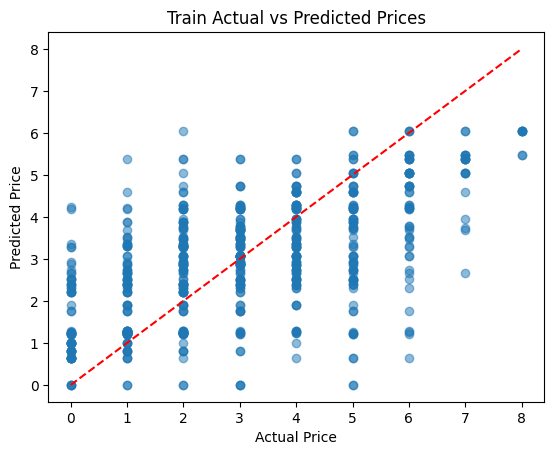

In [53]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

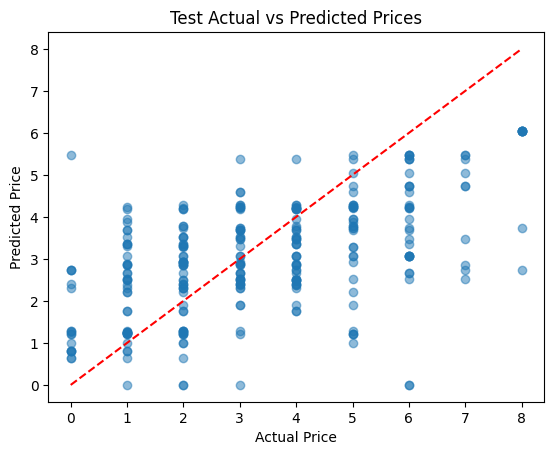

In [54]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()